# **Linear Regression With One Variable**

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**loading data**

In [ ]:
data("cars")
head(cars) 

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


**Scatter plot**

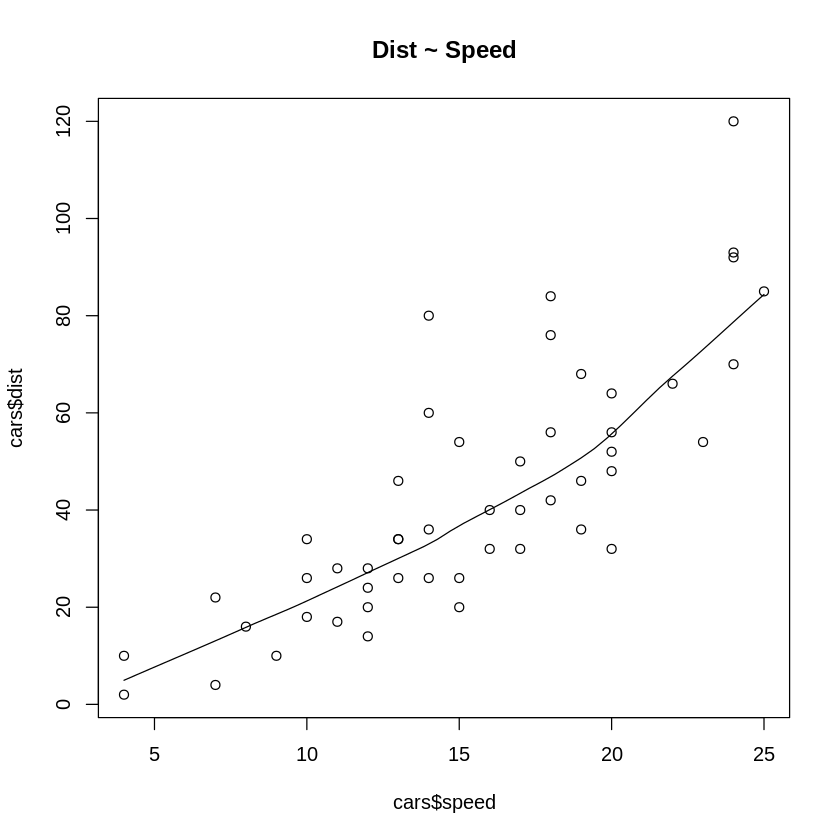

In [ ]:
scatter.smooth(x=cars$speed, y = cars$dist, main="Dist ~ Speed")

**Finding Correlation between speed and distance**

In [ ]:
cor(cars$speed, cars$dist)

[1] 0.8068949

**Building the Linear Model**

In [ ]:
linear_model <- lm(dist~speed, data = cars)
print(linear_model)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



**Diagnosing the Linear Mode**

In [ ]:
summary(linear_model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [ ]:
pred<-predict(linear_model, newdata = cars, interval = "prediction")

In [ ]:
write.csv(pred, file='out1.csv')

# **Multiple Linear Regression**

In [ ]:
input <- mtcars[,c("mpg","disp","hp","wt")]
print(head(input))

                   mpg disp  hp    wt
Mazda RX4         21.0  160 110 2.620
Mazda RX4 Wag     21.0  160 110 2.875
Datsun 710        22.8  108  93 2.320
Hornet 4 Drive    21.4  258 110 3.215
Hornet Sportabout 18.7  360 175 3.440
Valiant           18.1  225 105 3.460


**correlation**

In [ ]:
cor(input[, 1:4])

,mpg,disp,hp,wt
mpg,1.0000000,-0.8475514,-0.7761684,-0.8676594
disp,-0.8475514,1.0000000,0.7909486,0.8879799
hp,-0.7761684,0.7909486,1.0000000,0.6587479
wt,-0.8676594,0.8879799,0.6587479,1.0000000


**A Matrix of Scatter Plots**

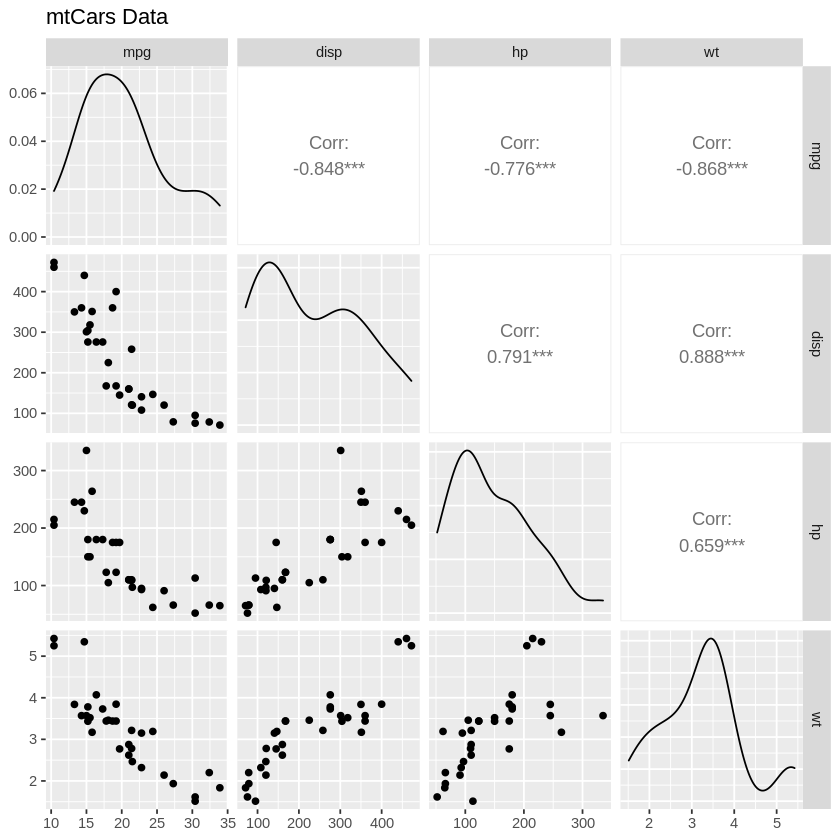

In [ ]:
ggpairs(data=input, columns=1:4, title="mtCars Data")

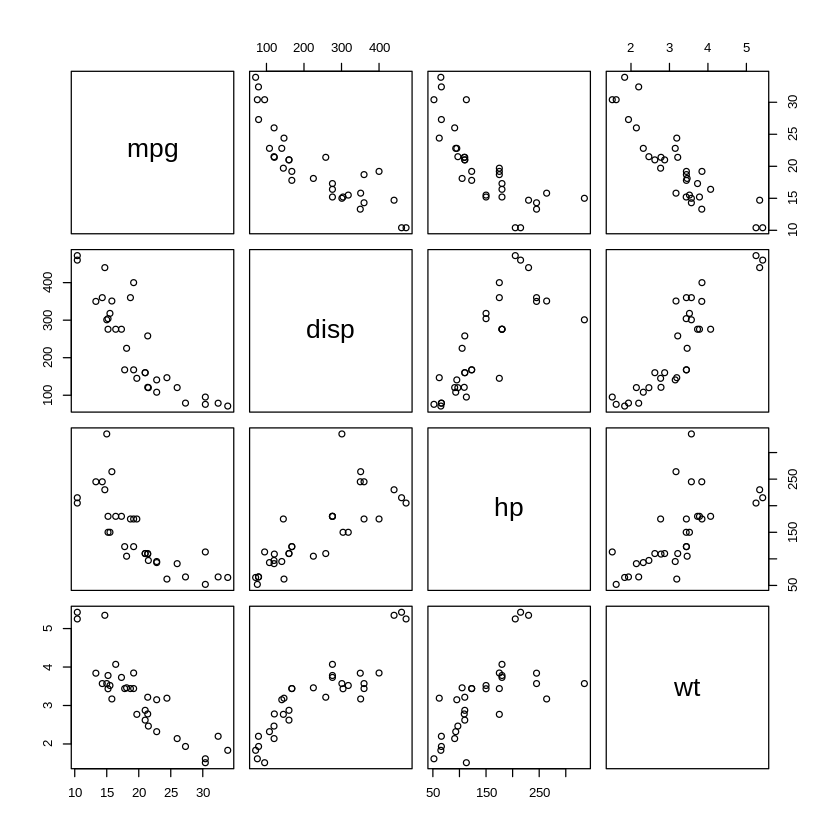

In [ ]:
pairs(input[1:4])

In [ ]:
model=lm(mpg~disp+hp+wt, data=input)
print(model)


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  



In [ ]:
summary(model)


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
disp        -0.000937   0.010350  -0.091  0.92851    
hp          -0.031157   0.011436  -2.724  0.01097 *  
wt          -3.800891   1.066191  -3.565  0.00133 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


mgp=37.1-0.03(hp)-3.8(wt)

In [ ]:
library(broom)
theme_set(theme_classic())

In [ ]:
model.diag.metrics <- augment(model)
head(model.diag.metrics)

.rownames,mpg,disp,hp,wt,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620,23.57003,-2.5700299,0.04436955,2.639297,0.0115203490,-0.99624300
Mazda RX4 Wag,21.0,160,110,2.875,22.60080,-1.6008028,0.04574230,2.668786,0.0046211123,-0.62097926
Datsun 710,22.8,108,93,2.320,25.28868,-2.4886829,0.06310019,2.641408,0.0159833450,-0.97430534
Hornet 4 Drive,21.4,258,110,3.215,21.21667,0.1833269,0.08842503,2.687101,0.0001283888,0.07276157
Hornet Sportabout,18.7,360,175,3.440,18.24072,0.4592780,0.16808173,2.685607,0.0018390548,0.19081276
Valiant,18.1,225,105,3.460,20.47216,-2.3721590,0.06719916,2.645458,0.0156011925,-0.93072509


In [ ]:
predict(model, newdata = input, interval = "prediction")

,fit,lwr,upr
Mazda RX4,23.570030,18.045806,29.09425
Mazda RX4 Wag,22.600803,17.072949,28.12866
Datsun 710,25.288683,19.715141,30.86222
Hornet 4 Drive,21.216673,15.577136,26.85621
Hornet Sportabout,18.240722,12.398463,24.08298
Valiant,20.472159,14.887882,26.05644
Duster 360,15.565648,9.802775,21.32852
Merc 240D,22.911499,17.175154,28.64784
Merc 230,22.040897,16.373810,27.70798
Merc 280,20.041143,14.336839,25.74545


**Create the diagnostic plots with the R base function:**

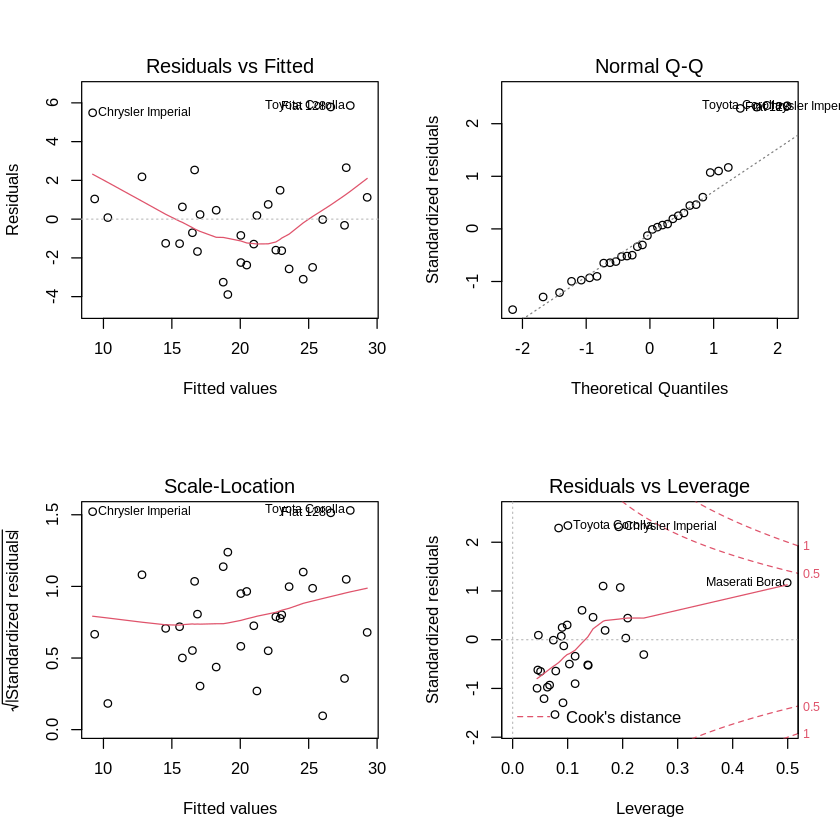

In [ ]:
par(mfrow = c(2, 2))
plot(model)

assumption can be checked by inspecting the Residuals vs Fitted plot (1st plot):

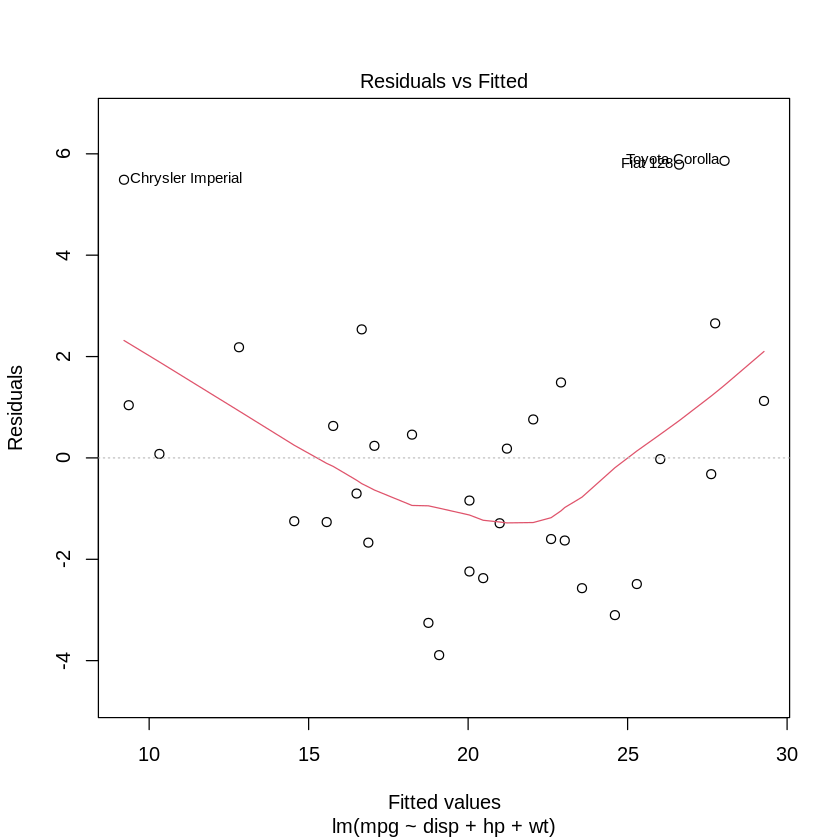

In [ ]:
plot(model, 1)

Ideally, the residual plot will show no fitted pattern. That is, the red line should be approximately horizontal at zero. The presence of a pattern may indicate a problem with some aspect of the linear model.

Homogeneity of variance This assumption can be checked by examining the scale-location plot, also known as the spread-location plot.

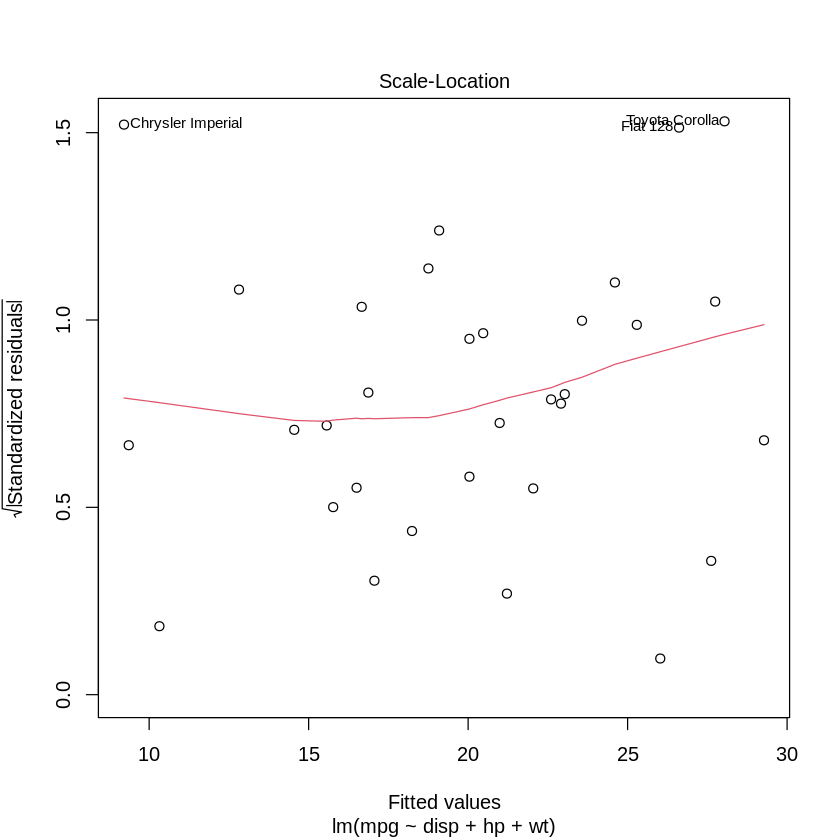

In [ ]:
plot(model, 3)

 Normality of residuals The QQ plot of residuals can be used to visually check the normality assumption.

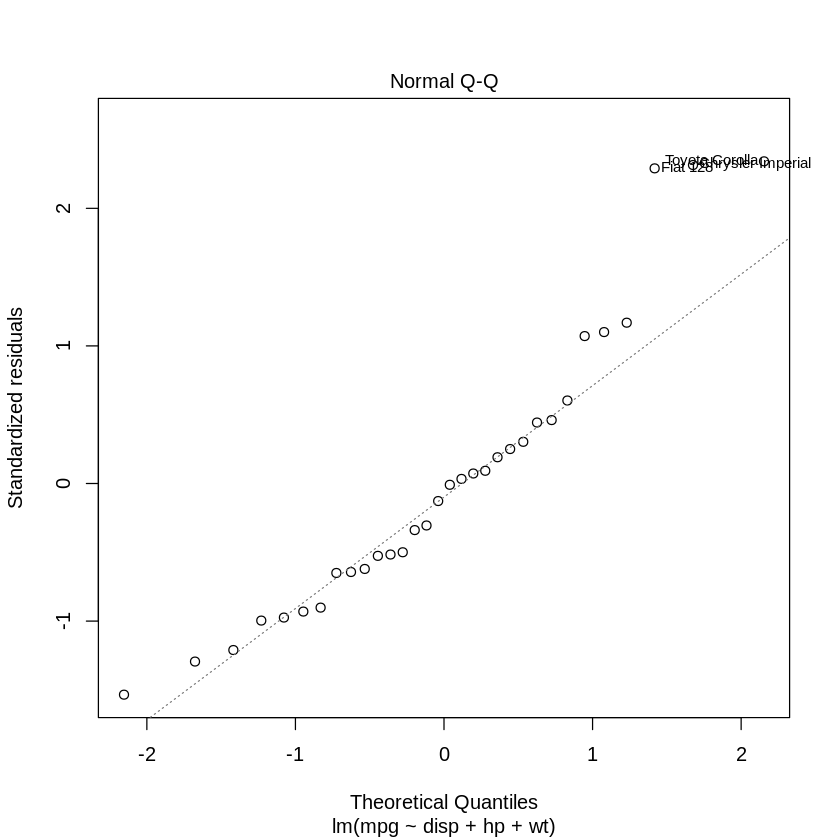

In [ ]:
plot(model, 2)

Outliers and high levarage points

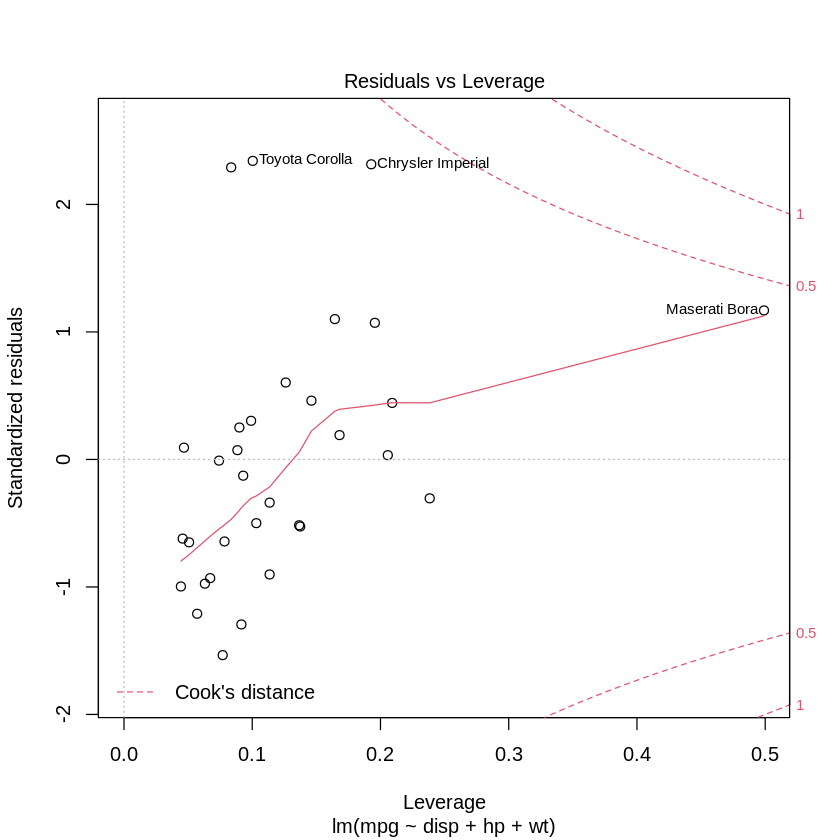

In [ ]:
plot(model, 5)

VIF for variable independence for testing multicollineraity

In [ ]:
install.packages("car",dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘bdsmatrix’, ‘estimability’, ‘insight’, ‘zoo’, ‘htmlwidgets’, ‘crosstalk’, ‘mitools’, ‘maptools’, ‘alr4’, ‘coxme’, ‘effects’, ‘leaps’, ‘lmtest’, ‘rgl’, ‘sandwich’, ‘survey’


Warning message in install.packages("car", dependencies = TRUE):
“installation of package ‘maptools’ had non-zero exit status”
Warning message in install.packages("car", dependencies = TRUE):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("car", dependencies = TRUE):
“installation of package ‘rgl’ had non-zero exit status”
Warning message in install.packages("car", dependencies = TRUE):
“installation of package ‘alr4’ had non-zero exit status”


In [ ]:
library("abind")

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘maptools’


Warning message in install.packages("car"):
“installation of package ‘maptools’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [ ]:
library("car")

ERROR: ignored

In [ ]:
vif(model)

ERROR: ignored

In [ ]:
install.packages("lm.beta")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(lm.beta)
lm.beta(model)


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Standardized Coefficients::
(Intercept)        disp          hp          wt 
 0.00000000 -0.01926874 -0.35443851 -0.61706350 


# **dominanceanalysis**

In [ ]:
install.packages("dominanceanalysis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dominanceanalysis)
model=lm(mpg~disp+hp+wt, data=input)
model
summary(model)
lm.beta(model)
da<-dominanceAnalysis(model)
print(da)
summary(da)


Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  



Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
disp        -0.000937   0.010350  -0.091  0.92851    
hp          -0.031157   0.011436  -2.724  0.01097 *  
wt          -3.800891   1.066191  -3.565  0.00133 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11



Call:
lm(formula = mpg ~ disp + hp + wt, data = input)

Standardized Coefficients::
(Intercept)        disp          hp          wt 
 0.00000000 -0.01926874 -0.35443851 -0.61706350 



Dominance analysis
Predictors: disp, hp, wt 
Fit-indices: r2 

* Fit index:  r2 
     complete conditional general
disp                           hp
hp                               
wt    disp,hp     disp,hp disp,hp

Average contribution:
   wt  disp    hp 
0.325 0.268 0.233 


,model,level,fit,disp,hp,wt
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.0000000,7.183433e-01,0.60243734,0.75283279
disp,disp,1,0.7183433,NA,0.02989684,0.06258724
hp,hp,1,0.6024373,1.458028e-01,NA,0.22434811
wt,wt,1,0.7528328,2.809779e-02,0.07395266,NA
Avl1,Average level 1,1,NA,8.695031e-02,0.05192475,0.14346768
dsp+h,disp+hp,2,0.7482402,NA,NA,0.07859596
dsp+w,disp+wt,2,0.7809306,NA,0.04590556,NA
hp+w,hp+wt,2,0.8267855,5.069061e-05,NA,NA
Avl2,Average level 2,2,NA,5.069061e-05,0.04590556,0.07859596
